Libraries loaded successfully
Sales Data Shape: (100, 7)
Customer Data Shape: (500, 9)
Data preparation completed

DESCRIPTIVE STATISTICS
----------------------
Mean Sales: 123650.48
Median Sales: 97955.50
Mode Sales: 6540.00
Standard Deviation: 100161.09


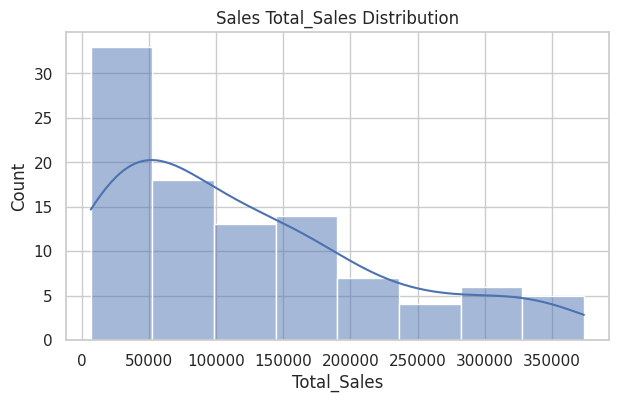

Shapiro Test p-value: 0.0000

CORRELATION ANALYSIS
--------------------
Correlation (Total_Sales vs Marketing): 0.86
Covariance: 1592587263.24


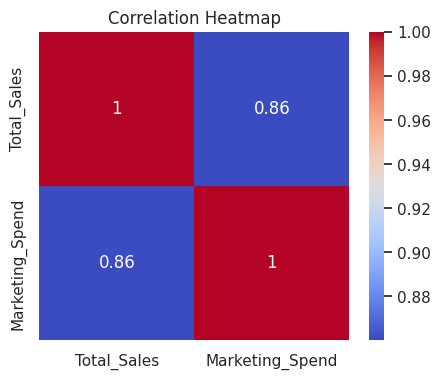


HYPOTHESIS TEST RESULTS
----------------------
T-test p-value (Region A vs B): 0.7096
One-sample T-test p-value: 1.0000
ANOVA p-value (Regions): 0.0972

CONFIDENCE INTERVAL (95%)
-------------------------
Average Sales: 123650.48 ± 19874.13
95% CI: [103776.35, 143524.61]

LINEAR REGRESSION RESULTS
-------------------------
R-squared: 0.74
p-value (Marketing Spend): 0.0000

STATISTICAL ANALYSIS REPORT
---------------------------
Average Sales: $123,650.48 ± $19,874.13 (95% CI)
Correlation (Sales–Marketing): 0.86
Marketing affects sales: p = 0.0000

Week 7 Statistical Business Analysis Completed Successfully


In [4]:
# =========================================================
# WEEK 7: INTRODUCTION TO STATISTICS FOR DATA SCIENCE
# PROJECT: STATISTICAL BUSINESS ANALYSIS
# =========================================================

# Install required libraries
!pip install pandas numpy scipy seaborn statsmodels matplotlib --quiet


# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

sns.set_theme(style="whitegrid")

print("Libraries loaded successfully")

# =========================================================
# DATA LOADING
# =========================================================

sales_df = pd.read_csv("/content/sales_data.csv")
customer_df = pd.read_csv("/content/customer_churn.csv")

print("Sales Data Shape:", sales_df.shape)
print("Customer Data Shape:", customer_df.shape)

# =========================================================
# DATA PREPARATION
# =========================================================

sales_df["Date"] = pd.to_datetime(sales_df["Date"])
sales_df["Total_Sales"] = sales_df["Total_Sales"].astype(float)

# Create mock Marketing Spend (business simulation)
np.random.seed(42)
sales_df["Marketing_Spend"] = sales_df["Total_Sales"] * np.random.uniform(0.1, 0.3, len(sales_df))

print("Data preparation completed")

# =========================================================
# 1️⃣ DESCRIPTIVE STATISTICS
# =========================================================

mean_sales = sales_df["Total_Sales"].mean()
median_sales = sales_df["Total_Sales"].median()
mode_sales = sales_df["Total_Sales"].mode()[0]
std_sales = sales_df["Total_Sales"].std()

print("\nDESCRIPTIVE STATISTICS")
print("----------------------")
print(f"Mean Sales: {mean_sales:.2f}")
print(f"Median Sales: {median_sales:.2f}")
print(f"Mode Sales: {mode_sales:.2f}")
print(f"Standard Deviation: {std_sales:.2f}")

# =========================================================
# 2️⃣ DATA DISTRIBUTION ANALYSIS
# =========================================================

plt.figure(figsize=(7,4))
sns.histplot(sales_df["Total_Sales"], kde=True)
plt.title("Sales Total_Sales Distribution")
plt.show()

# Normality Test (Shapiro-Wilk)
shapiro_test = stats.shapiro(sales_df["Total_Sales"])
print(f"Shapiro Test p-value: {shapiro_test.pvalue:.4f}")

# =========================================================
# 3️⃣ CORRELATION & COVARIANCE
# =========================================================

correlation = sales_df["Total_Sales"].corr(sales_df["Marketing_Spend"])
covariance = sales_df["Total_Sales"].cov(sales_df["Marketing_Spend"])

print("\nCORRELATION ANALYSIS")
print("--------------------")
print(f"Correlation (Total_Sales vs Marketing): {correlation:.2f}")
print(f"Covariance: {covariance:.2f}")

# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(
    sales_df[["Total_Sales", "Marketing_Spend"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()

# =========================================================
# 4️⃣ HYPOTHESIS TESTING (3 TESTS)
# =========================================================

# Split data by region
region_a = sales_df[sales_df["Region"] == sales_df["Region"].unique()[0]]["Total_Sales"]
region_b = sales_df[sales_df["Region"] == sales_df["Region"].unique()[1]]["Total_Sales"]

# Test 1: Independent T-test
t_stat, p_value_ttest = stats.ttest_ind(region_a, region_b, equal_var=False)

# Test 2: One-sample T-test
t_stat_one, p_value_one = stats.ttest_1samp(sales_df["Total_Sales"], mean_sales)

# Test 3: ANOVA
groups = [group["Total_Sales"].values for name, group in sales_df.groupby("Region")]
f_stat, p_value_anova = stats.f_oneway(*groups)

print("\nHYPOTHESIS TEST RESULTS")
print("----------------------")
print(f"T-test p-value (Region A vs B): {p_value_ttest:.4f}")
print(f"One-sample T-test p-value: {p_value_one:.4f}")
print(f"ANOVA p-value (Regions): {p_value_anova:.4f}")

# =========================================================
# 5️⃣ CONFIDENCE INTERVAL (95%)
# =========================================================

confidence_level = 0.95
n = len(sales_df["Total_Sales"])
sem = stats.sem(sales_df["Total_Sales"])
margin_error = sem * stats.t.ppf((1 + confidence_level) / 2, n - 1)

ci_lower = mean_sales - margin_error
ci_upper = mean_sales + margin_error

print("\nCONFIDENCE INTERVAL (95%)")
print("-------------------------")
print(f"Average Sales: {mean_sales:.2f} ± {margin_error:.2f}")
print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

# =========================================================
# 6️⃣ REGRESSION ANALYSIS
# =========================================================

X = sales_df["Marketing_Spend"]
y = sales_df["Total_Sales"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print("\nLINEAR REGRESSION RESULTS")
print("-------------------------")
print(f"R-squared: {model.rsquared:.2f}")
print(f"p-value (Marketing Spend): {model.pvalues.iloc[1]:.4f}")

# =========================================================
# 7️⃣ BUSINESS SUMMARY
# =========================================================

print("\nSTATISTICAL ANALYSIS REPORT")
print("---------------------------")
print(f"Average Sales: ${mean_sales:,.2f} ± ${margin_error:,.2f} (95% CI)")
print(f"Correlation (Sales–Marketing): {correlation:.2f}")
print(f"Marketing affects sales: p = {model.pvalues.iloc[1]:.4f}")

print("\nWeek 7 Statistical Business Analysis Completed Successfully")